In [ ]:
# LinearRegression()
# DecisionTreeRegressor()
# 히트탭
# 데이터 shape

# diabetes.csv

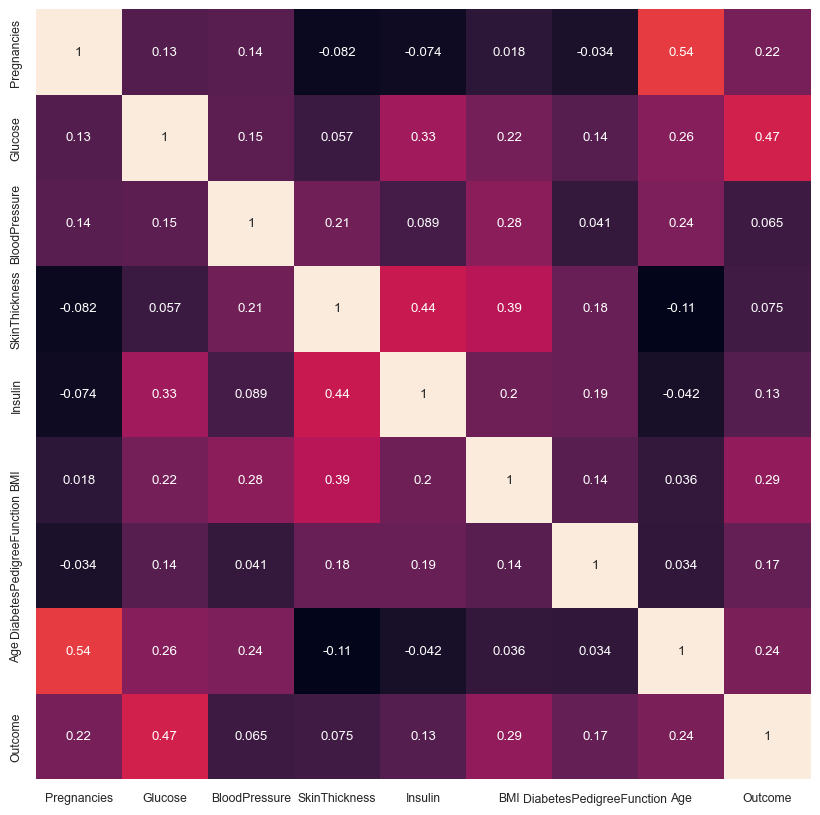

결측치 확인:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<<Result>>
Linear Regression의 평균제곱근오차 52.240582848747955


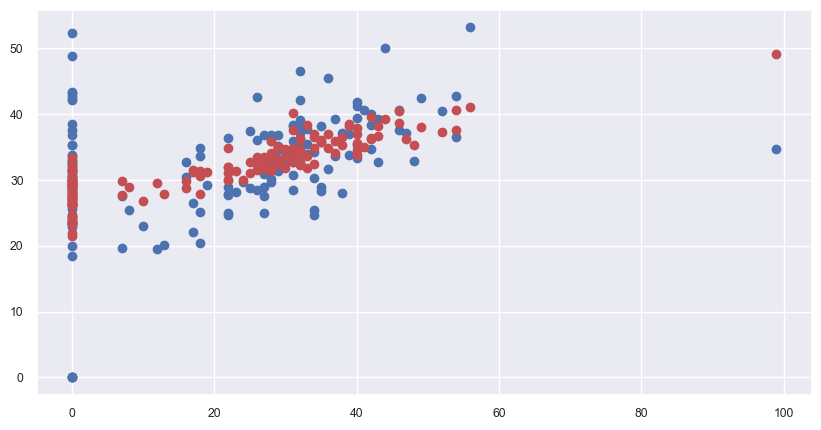

DecisionTree Regression의 평균제곱근오차 106.19474025974026


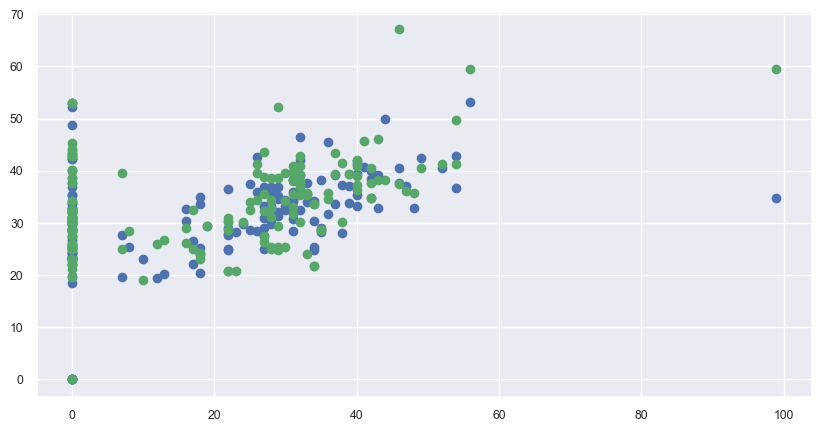

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #과학용 계산 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#회귀 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# 0. CSV 파일 불러오기
file = "C:/AI/diabetes.csv"  # CSV 파일 경로
df = pd.read_csv(file)

# 1. 상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


# 2. 데이터 전처리 (X: 특성, y: 타겟)
print("결측치 확인:\n", df.isnull().sum())
X = df.drop(columns=['Outcome', 'BMI'])
y = df["BMI"]

# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 4. 회귀 모델 학습
print("\n<<Result>>")
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
ly_preds = model_LR.predict(X_test)
print('Linear Regression의 평균제곱근오차', mean_squared_error(ly_preds, y_test))
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='r', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)
dy_preds = model_DT.predict(X_test)
print('DecisionTree Regression의 평균제곱근오차', mean_squared_error(dy_preds, y_test))
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()